In [1]:
TASK = 8

def preprocessing(number):
    return number-1

def task(number1, number2):
    return number1+number2

In [234]:
root = TaskTree(None) 

In [260]:
import time

class GeoTaskTree:
    def __init__(self, number):
        self.number = number  # This stores the node's value
        self.children = []  # This stores references to child nodes
        self.parent_to_children = {}
        self.children_to_parent = {}

    def add_child(self, child):
        self.children.append(child)  # Add a child node to the children list

    def get_childrens(self):
        return [child for child in self.children]  # Return a list of child node values
    
    def get_parent_to_children(self):
        return self.parent_to_children
    
    def get_children_to_parent(self):
        return self.children_to_parent
    
    def build_parent_tree(self):
        layer = self.children  # Start with the initial children
        print(len(layer))
        p = 0
        parents = set()
        # for loop in every two elements
        while len(layer) > 1:  # Loop until we have only one parent
            next_layer = []
            i = 0
            while i < len(layer):
                if i + 1 < len(layer):
                    p += 1
                    print("Length of the layer is ", len(layer), "Now the i is ", i)
                    self.parent_to_children[f'p{p}'] = [layer[i], layer[i+1]]
                    print("Childrens are ", layer[i], layer[i+1])
                    # self.parent_to_children[f'p{p}'] = [self.children[i].number, self.children[i+1].number]
                    self.children_to_parent[layer[i]] = f'p{p}'
                    self.children_to_parent[layer[i+1]] = f'p{p}'
                    parents.add(f'p{p}')
                    print(f'p{p}')
                    next_layer.append(f'p{p}')
                    i += 2  # Move to the next pair
                else:
                    None
            for new_childrens in next_layer:
                self.add_child(new_childrens)
            layer = next_layer.copy()

              # Move to the next level
        # next level: I have 

# Initialize the root of the tree with a placeholder value or specific root value
root = GeoTaskTree(None)  # None can be replaced with a specific root value if needed

# random_integers = [41, 57, 74, 31, 81, 97, 30, 59]  # Example list of integers
random_integers = []
PARTITIONS = 8
for i in range(PARTITIONS):
    random_integers.append(i)

# Add each integer as a child to the root
for number in random_integers:
    # child_node = Tree(number)  # Create a new Tree node for each number
    root.add_child(number)  # Add this new node as a child of the root

root.build_parent_tree()

8
Length of the layer is  8 Now the i is  0
Childrens are  0 1
p1
Length of the layer is  8 Now the i is  2
Childrens are  2 3
p2
Length of the layer is  8 Now the i is  4
Childrens are  4 5
p3
Length of the layer is  8 Now the i is  6
Childrens are  6 7
p4
Length of the layer is  4 Now the i is  0
Childrens are  p1 p2
p5
Length of the layer is  4 Now the i is  2
Childrens are  p3 p4
p6
Length of the layer is  2 Now the i is  0
Childrens are  p5 p6
p7


In [261]:
# Initialize the root of the tree with a placeholder value or specific root value
root = GeoTaskTree(None)  # None can be replaced with a specific root value if needed

# random_integers = [41, 57, 74, 31, 81, 97, 30, 59]  # Example list of integers
random_integers = []
PARTITIONS = 8
for i in range(PARTITIONS):
    random_integers.append(i)

def base_task(number1, number2):
    return number1+number2

# Add each integer as a child to the root
for number in random_integers:
    # child_node = Tree(number)  # Create a new Tree node for each number
    root.add_child(number, task=base_task)
    
root.build_parent_tree()

TypeError: GeoTaskTree.add_child() got an unexpected keyword argument 'task'

In [257]:
root.get_childrens()

[0, 1, 2, 3, 4, 5, 6, 7]

8
Length of the layer is  8 Now the i is  0
Childrens are  0 1
p1
Length of the layer is  8 Now the i is  2
Childrens are  2 3
p2
Length of the layer is  8 Now the i is  4
Childrens are  4 5
p3
Length of the layer is  8 Now the i is  6
Childrens are  6 7
p4
Length of the layer is  4 Now the i is  0
Childrens are  p1 p2
p5
Length of the layer is  4 Now the i is  2
Childrens are  p3 p4
p6
Length of the layer is  2 Now the i is  0
Childrens are  p5 p6
p7


In [224]:
root.get_childrens()

[41, 57, 74, 31, 81, 97, 30, 59, 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7']

In [225]:
root.get_children_to_parent()

{41: 'p1',
 57: 'p1',
 74: 'p2',
 31: 'p2',
 81: 'p3',
 97: 'p3',
 30: 'p4',
 59: 'p4',
 'p1': 'p5',
 'p2': 'p5',
 'p3': 'p6',
 'p4': 'p6',
 'p5': 'p7',
 'p6': 'p7'}

In [226]:
root.get_parent_to_children()

{'p1': [41, 57],
 'p2': [74, 31],
 'p3': [81, 97],
 'p4': [30, 59],
 'p5': ['p1', 'p2'],
 'p6': ['p3', 'p4'],
 'p7': ['p5', 'p6']}

In [ ]:
### add base task
### loop through the parents, keep results in the memory


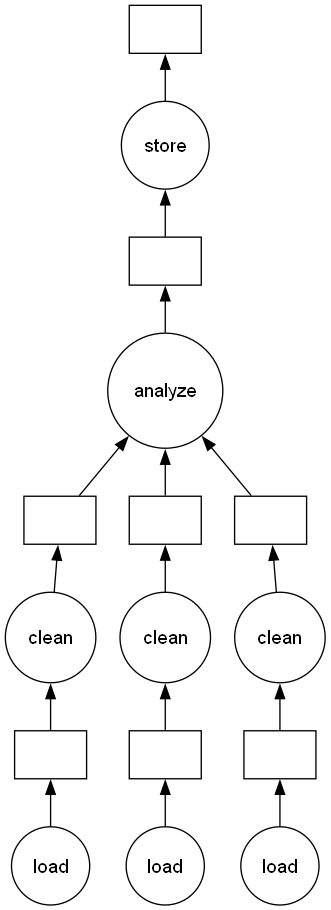

In [307]:
from dask import delayed, visualize

# Define your tasks
@delayed
def load(filename):
    return "he"

@delayed
def clean(data):
    return "bla"

@delayed
def analyze(sequence_of_data):
    return "blabla"

@delayed
def store(result):
    return f"Result stored: {result}"

# Building the task graph
load1 = load('myfile.a.data')
load2 = load('myfile.b.data')
load3 = load('myfile.c.data')
clean1 = clean(load1)
clean2 = clean(load2)
clean3 = clean(load3)
analyze_result = analyze([clean1, clean2, clean3])
store_result = store(analyze_result)

# Visualize the task graph
visualize([store_result], filename='task_graph.png')  # This saves the graph

In [297]:
def base_function(i):
    return i + 1

def add(a, b):
    return a + b

def double(x):
    return x * 2

x = 1
y = inc(x)
z = add(y, 10)

data = [1, 2, 3, 4]

In [289]:
d = {'x': 1,
     'y': (inc, 'x'),
     'z': (add, 'y', 10)}

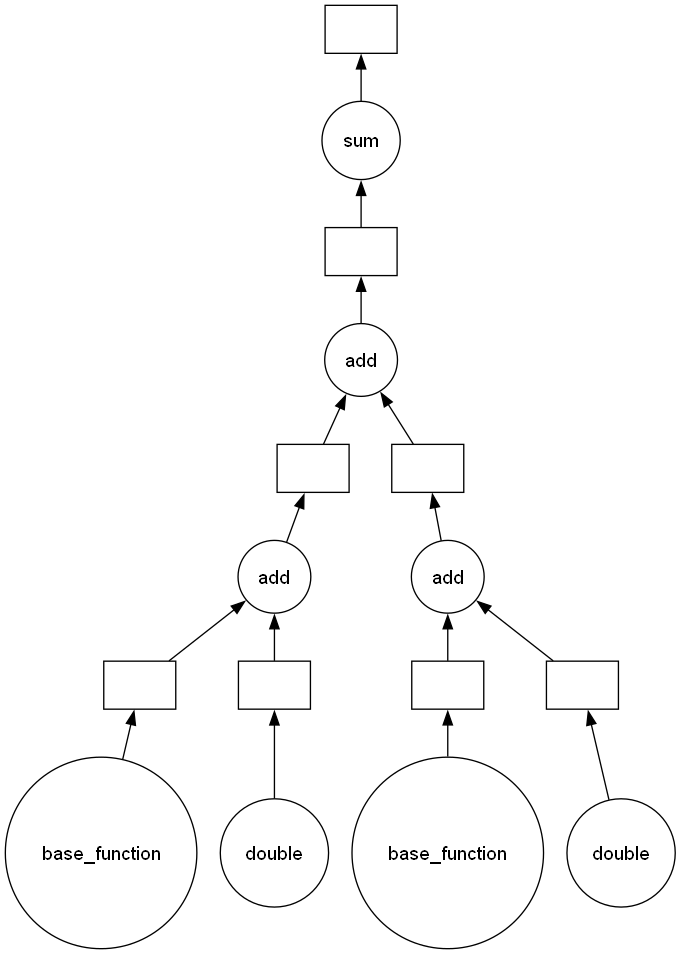

In [298]:
import dask

PARTITIONS = 16
STEPS = 16*2

data = [1, 2, 3, 4]

output = []
for x in data:
    a = dask.delayed(base_function)(x)
    b = dask.delayed(double)(x)
    c = dask.delayed(base_function)(x)
    d = dask.delayed(double)(x)

    e = dask.delayed(add)(a, b)
    f = dask.delayed(add)(c, d)

    g = dask.delayed(add)(e, f)

output.append(g)

total = dask.delayed(sum)(output)

total.visualize()  # see image to the right

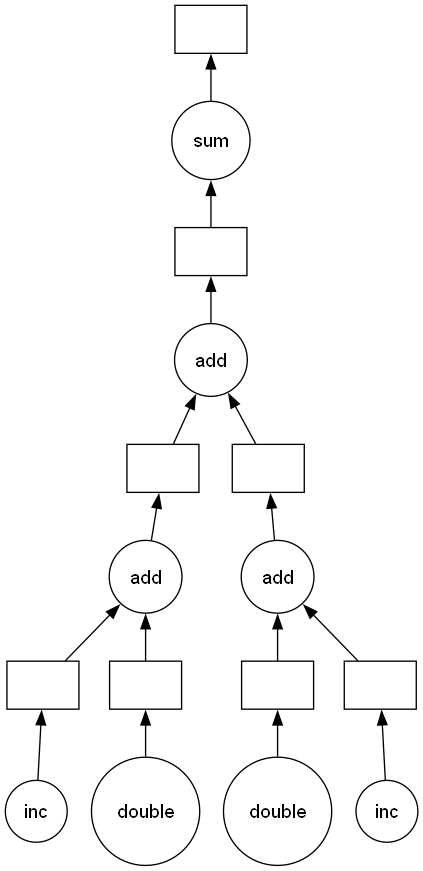